In [17]:
import pandas as pd

# Define the file path
file_path = "Food_Waste_Optimization_Supermarkets.csv"

try:
    # Attempt to read the CSV with common encodings and the 'python' engine
    try:
        df = pd.read_csv(file_path, encoding='latin-1', engine='python')
    except UnicodeDecodeError:
        # If latin-1 fails, try cp1252
        df = pd.read_csv(file_path, encoding='cp1252', engine='python')
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the file name and path.")
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")

# Display the first 5 rows if the DataFrame was loaded successfully
if 'df' in locals():
    print(df.head().to_markdown(index=False))

| Product_ID   | Item_Name       | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:----------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread     | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk | Dairy Products   |              199 |              93 |              106 |           60 | 29-10-2024         | 03-11-2024    | Lucknow          | Expired        | Rainy     | North    |
| P003         | Alphonso Mango  | nan              |              112 |               5 |              107 |       

In [18]:


# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Print only the duplicate rows
if not duplicate_rows.empty:
  print("\nDuplicate Rows:")
  print(duplicate_rows.to_markdown(index=False))
else:
  print("\nNo duplicate rows found.")



Duplicate Rows:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P3036        | Chicken Biryani   | Prepared Food    |              194 |              14 |              180 |          150 | 20-04-2025         | 23-04-2025    | Kolkata          | Damaged        | Rainy     | East     |
| P3872        | Yellow Banana     | Fresh Fruits     |              151 |             124 |               27 |           50 | 10-04-2025         | 20-04-2025    | Jaipur           | Expired        | Moderate  | North    |
| P2048        | Plain Curd        | Dairy Products   |               50 |              43 

In [19]:


# Remove duplicate rows, keeping the first occurrence
df_no_duplicates = df.drop_duplicates()

# Verify that duplicates have been removed
if not df_no_duplicates[df_no_duplicates.duplicated()].empty:
  print("\nDuplicates still exist after drop_duplicates().")
else:
  print("\nDuplicates successfully removed.")

# Display the first 5 rows of the DataFrame without duplicates
print("\nDataFrame after removing duplicates (first 5 rows):")
print(df_no_duplicates.head().to_markdown(index=False))

# Display the shape of the original and the new DataFrame to show the number of removed rows
print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame without duplicates shape: {df_no_duplicates.shape}")


Duplicates successfully removed.

DataFrame after removing duplicates (first 5 rows):
| Product_ID   | Item_Name       | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:----------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread     | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk | Dairy Products   |              199 |              93 |              106 |           60 | 29-10-2024         | 03-11-2024    | Lucknow          | Expired        | Rainy     | North    |
| P003         | Alphonso Man

In [20]:


df_no_duplicates.shape

(5577, 13)

In [21]:


# Print the first 20 rows of the DataFrame without duplicates
print("\nFirst 100 rows of the DataFrame without duplicates:")
print(df_no_duplicates.head(20).to_markdown(index=False))


First 100 rows of the DataFrame without duplicates:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 29-10-2024         | 03-11-2024    | Lucknow          | Expired        | Rainy     | North    |
| P003         | Alphonso Mango    | nan              |

In [22]:
#  delete rows where Item_Name column and Category column are "nan"

# Before dropping rows where both 'Item_Name' and 'Category' are NaN
print("Shape before dropping rows with NaN in both 'Item_Name' and 'Category':", df_no_duplicates.shape)

# Drop rows where both 'Item_Name' and 'Category' are NaN
df_cleaned = df_no_duplicates.dropna(subset=['Item_Name', 'Category'], how='all')

# After dropping rows
print("Shape after dropping rows with NaN in both 'Item_Name' and 'Category':", df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame to verify
print("\nFirst 5 rows of the DataFrame after removing rows with NaN in both 'Item_Name' and 'Category':")
print(df_cleaned.head(30).to_markdown(index=False))

Shape before dropping rows with NaN in both 'Item_Name' and 'Category': (5577, 13)
Shape after dropping rows with NaN in both 'Item_Name' and 'Category': (5562, 13)

First 5 rows of the DataFrame after removing rows with NaN in both 'Item_Name' and 'Category':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              1

In [23]:
# fill values of Item_Name based on the Item_Name and Category match in df_cleaned

import pandas as pd
# Identify rows with missing 'Item_Name'
missing_item_name_rows = df_cleaned[df_cleaned['Item_Name'].isnull()]

if not missing_item_name_rows.empty:
    print("\nRows with missing 'Item_Name' before filling:")
    print(missing_item_name_rows.head().to_markdown(index=False))
else:
    print("\nNo rows with missing 'Item_Name' found.")

# Create a mapping from Category and a non-null Item_Name to the corresponding Item_Name
# We'll group by 'Category' and 'Item_Name', then take the first valid 'Item_Name' for each group.
# This helps in case there are multiple non-null Item_Names for the same Category (though ideally there should be one canonical name).
item_name_mapping = df_cleaned.dropna(subset=['Item_Name']).groupby('Category')['Item_Name'].first().to_dict()

# Fill missing 'Item_Name' values based on the mapping
# We use apply and a lambda function to look up the Item_Name based on the 'Category'
df_cleaned['Item_Name'] = df_cleaned.apply(
    lambda row: item_name_mapping.get(row['Category'], row['Item_Name'])
    if pd.isnull(row['Item_Name']) else row['Item_Name'],
    axis=1
)

# Verify that missing 'Item_Name' values have been filled
missing_item_name_rows_after = df_cleaned[df_cleaned['Item_Name'].isnull()]

if not missing_item_name_rows_after.empty:
    print("\nRows with missing 'Item_Name' after filling:")
    print(missing_item_name_rows_after.head().to_markdown(index=False))
else:
    print("\nNo rows with missing 'Item_Name' found after filling.")

# Display the first few rows to show the changes
print("\nFirst 30 rows of the DataFrame after filling missing 'Item_Name':")
print(df_cleaned.head(30).to_markdown(index=False))


Rows with missing 'Item_Name' before filling:
| Product_ID   |   Item_Name | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|------------:|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P015         |         nan | Fresh Fruits     |              171 |               5 |              166 |          150 | 01-03-2025         | 15-03-2025    | Hyderabad        | Unsold_Edible  | Moderate  | South    |
| P045         |         nan | Fresh Vegetables |              151 |              17 |              134 |           70 | 09-11-2024         | 19-11-2024    | Ahmedabad        | Aesthetic      | Hot       | West     |
| P070         |         nan | Processed Food   |               73 |              10 

C:\Users\k kashinath\AppData\Local\Temp\ipykernel_3084\1014391174.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Item_Name'] = df_cleaned.apply(


In [24]:

import pandas as pd
# Identify rows with missing 'Category'
missing_category_rows = df_cleaned[df_cleaned['Category'].isnull()]

if not missing_category_rows.empty:
    print("\nRows with missing 'Category' before filling:")
    print(missing_category_rows.head().to_markdown(index=False))
else:
    print("\nNo rows with missing 'Category' found.")

# Create a mapping from Item_Name to the corresponding Category
# We'll group by 'Item_Name' and take the first non-null 'Category' for each item.
category_mapping = df_cleaned.dropna(subset=['Category']).groupby('Item_Name')['Category'].first().to_dict()

# Fill missing 'Category' values based on the mapping
df_cleaned['Category'] = df_cleaned.apply(
    lambda row: category_mapping.get(row['Item_Name'], row['Category'])
    if pd.isnull(row['Category']) else row['Category'],
    axis=1
)

# Verify that missing 'Category' values have been filled
missing_category_rows_after = df_cleaned[df_cleaned['Category'].isnull()]

if not missing_category_rows_after.empty:
    print("\nRows with missing 'Category' after filling:")
    print(missing_category_rows_after.head().to_markdown(index=False))
else:
    print("\nNo rows with missing 'Category' found after filling.")

# Display the first few rows to show the changes
print("\nFirst 30 rows of the DataFrame after filling missing 'Category':")
print(df_cleaned.head(30).to_markdown(index=False))


Rows with missing 'Category' before filling:
| Product_ID   | Item_Name         |   Category |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|-----------:|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P003         | Alphonso Mango    |        nan |              112 |               5 |              107 |          100 | 07-10-2024         | 14-10-2024    | Delhi            | Expired        | Rainy     | North    |
| P029         | Vegetable Samosa  |        nan |               68 |              40 |               28 |           30 | 29-03-2025         | 01-04-2025    | Delhi            | Expired        | Moderate  | North    |
| P067         | White Cauliflower |        nan |               73 |              47 |

C:\Users\k kashinath\AppData\Local\Temp\ipykernel_3084\1393866728.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Category'] = df_cleaned.apply(


In [25]:
#  print Stock_Quantity null values 20  df_cleaned

# Identify rows with missing 'Stock_Quantity'
missing_stock_quantity_rows = df_cleaned[df_cleaned['Stock_Quantity'].isnull()]


if not missing_stock_quantity_rows.empty:
    print("\nRows with missing 'Stock_Quantity' (first 20):")
    print(missing_stock_quantity_rows.head(20).to_markdown(index=False))
else:
    print("\nNo rows with missing 'Stock_Quantity' found.")


Rows with missing 'Stock_Quantity' (first 20):
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P041         | Chicken Biryani   | Prepared Food    |              nan |              11 |               29 |          150 | 28-03-2025         | 31-03-2025    | Jaipur           | Damaged        | Rainy     | nan      |
| P061         | Soft Paneer       | Dairy Products   |              nan |              73 |              110 |          400 | 15-02-2025         | 22-02-2025    | Delhi            | Expired        | Rainy     | North    |
| P083         | White Bread       | Bakery Items     |     

In [26]:
#  fill Stock_Quantity and convert negative valuesinto positive in df_cleaned by adding Waste_Quantity + Sold_Quantity in Stock_Quantity nan place if Waste_Quantity and Sold_Quantity are not nan

import pandas as pd
# Before filling 'Stock_Quantity' NaN values
print("\nShape before filling 'Stock_Quantity' NaNs:", df_cleaned.shape)

# Fill NaN values in 'Stock_Quantity'
# Apply the function only to rows where 'Stock_Quantity' is NaN
nan_stock_mask = df_cleaned['Stock_Quantity'].isnull()

# For rows where Stock_Quantity is NaN, if Waste_Quantity and Sold_Quantity are not NaN, sum them
df_cleaned.loc[nan_stock_mask, 'Stock_Quantity'] = df_cleaned.loc[nan_stock_mask].apply(
    lambda row: row['Waste_Quantity'] + row['Sold_Quantity']
    if pd.notnull(row['Waste_Quantity']) and pd.notnull(row['Sold_Quantity'])
    else row['Stock_Quantity'], # Keep the original NaN if Waste_Quantity or Sold_Quantity is NaN
    axis=1
)

# Convert negative values in 'Stock_Quantity' to positive
df_cleaned['Stock_Quantity'] = df_cleaned['Stock_Quantity'].abs()


# After filling 'Stock_Quantity' NaN values and converting negative to positive
print("Shape after filling 'Stock_Quantity' NaNs and converting negative to positive:", df_cleaned.shape)

# Verify that missing 'Stock_Quantity' values have been filled and negative values are now positive
missing_stock_quantity_rows_after = df_cleaned[df_cleaned['Stock_Quantity'].isnull()]

if not missing_stock_quantity_rows_after.empty:
    print("\nRows with missing 'Stock_Quantity' after filling (first 20):")
    print(missing_stock_quantity_rows_after.head(20).to_markdown(index=False))
else:
    print("\nNo rows with missing 'Stock_Quantity' found after filling.")

# Display the first few rows to show the changes
print("\nFirst 30 rows of the DataFrame after filling and correcting 'Stock_Quantity':")
print(df_cleaned.head(30).to_markdown(index=False))

# Check for any remaining negative values in 'Stock_Quantity'
negative_stock_values = df_cleaned[df_cleaned['Stock_Quantity'] < 0]

if not negative_stock_values.empty:
    print("\nRows with negative 'Stock_Quantity' after correction:")
    print(negative_stock_values.head().to_markdown(index=False))
else:
    print("\nNo negative 'Stock_Quantity' values found after correction.")


Shape before filling 'Stock_Quantity' NaNs: (5562, 13)
Shape after filling 'Stock_Quantity' NaNs and converting negative to positive: (5562, 13)

Rows with missing 'Stock_Quantity' after filling (first 20):
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P482         | Basmati Rice      | Packaged Grains  |              nan |              22 |              nan |           70 | 13-03-2025         | 30-04-2025    | Bengaluru        | Unsold_Edible  | Rainy     | South    |
| P536         | White Cauliflower | Fresh Vegetables |              nan |              35 |              nan |           7

C:\Users\k kashinath\AppData\Local\Temp\ipykernel_3084\8989254.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Stock_Quantity'] = df_cleaned['Stock_Quantity'].abs()


In [27]:
#  print rows count from df_cleaned where Stock_Quantity and Waste_Quantity are nan and print rows also

# Filter rows where both 'Stock_Quantity' and 'Waste_Quantity' are NaN
nan_stock_waste_rows = df_cleaned[df_cleaned['Stock_Quantity'].isnull() & df_cleaned['Waste_Quantity'].isnull()]

# Print the count of such rows
print(f"\nNumber of rows where 'Stock_Quantity' and 'Waste_Quantity' are NaN: {len(nan_stock_waste_rows)}")

# Print the rows themselves
if not nan_stock_waste_rows.empty:
    print("\nRows where 'Stock_Quantity' and 'Waste_Quantity' are NaN:")
    print(nan_stock_waste_rows.to_markdown(index=False))
else:
    print("\nNo rows found where both 'Stock_Quantity' and 'Waste_Quantity' are NaN.")


Number of rows where 'Stock_Quantity' and 'Waste_Quantity' are NaN: 14

Rows where 'Stock_Quantity' and 'Waste_Quantity' are NaN:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P482         | Basmati Rice      | Packaged Grains  |              nan |              22 |              nan |           70 | 13-03-2025         | 30-04-2025    | Bengaluru        | Unsold_Edible  | Rainy     | South    |
| P536         | White Cauliflower | Fresh Vegetables |              nan |              35 |              nan |           70 | 07-04-2025         | 17-04-2025    | Ahmedabad        | Unsold_Edible  | 

In [28]:
# F delete rows count from df_cleaned where Stock_Quantity and Waste_Quantity are nan and print rows also.print shape befoer and after

# Print shape before deletion
print("Shape before deleting rows with NaN in 'Stock_Quantity' and 'Waste_Quantity':", df_cleaned.shape)

# Delete rows where both 'Stock_Quantity' and 'Waste_Quantity' are NaN
df_cleaned = df_cleaned.dropna(subset=['Stock_Quantity', 'Waste_Quantity'], how='all')

# Print shape after deletion
print("Shape after deleting rows with NaN in 'Stock_Quantity' and 'Waste_Quantity':", df_cleaned.shape)

# Verify that these rows have been deleted
nan_stock_waste_rows_after = df_cleaned[df_cleaned['Stock_Quantity'].isnull() & df_cleaned['Waste_Quantity'].isnull()]

if not nan_stock_waste_rows_after.empty:
    print("\nRows where 'Stock_Quantity' and 'Waste_Quantity' are still NaN after deletion:")
    print(nan_stock_waste_rows_after.to_markdown(index=False))
else:
    print("\nNo rows found where both 'Stock_Quantity' and 'Waste_Quantity' are NaN after deletion.")

# Display the first few rows of the cleaned DataFrame
print("\nFirst 30 rows of the DataFrame after deleting rows with NaN in 'Stock_Quantity' and 'Waste_Quantity':")
print(df_cleaned.head(30).to_markdown(index=False))

Shape before deleting rows with NaN in 'Stock_Quantity' and 'Waste_Quantity': (5562, 13)
Shape after deleting rows with NaN in 'Stock_Quantity' and 'Waste_Quantity': (5548, 13)

No rows found where both 'Stock_Quantity' and 'Waste_Quantity' are NaN after deletion.

First 30 rows of the DataFrame after deleting rows with NaN in 'Stock_Quantity' and 'Waste_Quantity':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aes

In [29]:
# : if 4th column and 6th column are nan then fill with 0. or if 6 th column is 0 and 4th and 5th are not 0 then fill 6th column = 4thcolumn - 5thcolumn and convrt it to positive value .
# print row count where both 4th column and 5th column are nan before and after filling

import pandas as pd
# Before filling NaN and performing calculations
initial_nan_stock_sold = df_cleaned[df_cleaned['Stock_Quantity'].isnull() & df_cleaned['Sold_Quantity'].isnull()]
print(f"\nInitial count of rows where 'Stock_Quantity' and 'Sold_Quantity' are NaN: {len(initial_nan_stock_sold)}")


# Apply the filling and calculation logic
def fill_and_calculate_quantities(row):
    # Fill NaN in 'Stock_Quantity' and 'Sold_Quantity' with 0 if both are NaN
    if pd.isnull(row['Stock_Quantity']) and pd.isnull(row['Sold_Quantity']):
        row['Stock_Quantity'] = 0
        row['Sold_Quantity'] = 0

    # If 'Sold_Quantity' is 0 and 'Stock_Quantity' and 'Waste_Quantity' are not 0,
    # calculate 'Sold_Quantity' and convert to positive
    if row['Sold_Quantity'] == 0 and pd.notnull(row['Stock_Quantity']) and pd.notnull(row['Waste_Quantity']):
        row['Sold_Quantity'] = abs(row['Stock_Quantity'] - row['Waste_Quantity'])

    return row

# Apply the function row-wise
df_cleaned = df_cleaned.apply(fill_and_calculate_quantities, axis=1)

# After filling and performing calculations
final_nan_stock_sold = df_cleaned[df_cleaned['Stock_Quantity'].isnull() & df_cleaned['Sold_Quantity'].isnull()]
print(f"Final count of rows where 'Stock_Quantity' and 'Sold_Quantity' are NaN: {len(final_nan_stock_sold)}")

# Display the first few rows to show the changes
print("\nFirst 30 rows of the DataFrame after filling and calculating quantities:")
print(df_cleaned.head(30).to_markdown(index=False))


Initial count of rows where 'Stock_Quantity' and 'Sold_Quantity' are NaN: 15
Final count of rows where 'Stock_Quantity' and 'Sold_Quantity' are NaN: 0

First 30 rows of the DataFrame after filling and calculating quantities:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |             

In [30]:
print(df_cleaned.shape)

(5548, 13)


In [31]:
# : fill Sold_Quantity in df_cleaned where Sold_Quantity is nan or 0  .fill by Sold_Quantity = Waste_Quantity - Stock_Quantity . make all values of Sold_Quantity positive

import pandas as pd
# Identify rows where 'Sold_Quantity' is NaN or 0
sold_quantity_mask = df_cleaned['Sold_Quantity'].isnull() | (df_cleaned['Sold_Quantity'] == 0)

# Apply the formula only to rows where 'Sold_Quantity' is NaN or 0
# Ensure 'Waste_Quantity' and 'Stock_Quantity' are not NaN for calculation
df_cleaned.loc[sold_quantity_mask, 'Sold_Quantity'] = df_cleaned.loc[sold_quantity_mask].apply(
    lambda row: row['Waste_Quantity'] - row['Stock_Quantity']
    if pd.notnull(row['Waste_Quantity']) and pd.notnull(row['Stock_Quantity'])
    else row['Sold_Quantity'], # Keep the original value (NaN or 0) if components are NaN
    axis=1
)

# Make all values in 'Sold_Quantity' positive by taking the absolute value
df_cleaned['Sold_Quantity'] = df_cleaned['Sold_Quantity'].abs()

# Display the first few rows to show the changes
print("\nFirst 30 rows of the DataFrame after filling and correcting 'Sold_Quantity':")
print(df_cleaned.head(30).to_markdown(index=False))

# Check for any remaining NaN values in 'Sold_Quantity' in the original mask locations
remaining_nan_sold_quantity = df_cleaned.loc[sold_quantity_mask, 'Sold_Quantity'].isnull()

if remaining_nan_sold_quantity.any():
    print("\nRows with remaining NaN 'Sold_Quantity' after filling:")
    print(df_cleaned.loc[sold_quantity_mask & remaining_nan_sold_quantity].to_markdown(index=False))
else:
    print("\nNo remaining NaN 'Sold_Quantity' values in the locations that were initially NaN or 0.")

# Check for any negative values in 'Sold_Quantity' after correction
negative_sold_values = df_cleaned[df_cleaned['Sold_Quantity'] < 0]

if not negative_sold_values.empty:
    print("\nRows with negative 'Sold_Quantity' after correction:")
    print(negative_sold_values.head().to_markdown(index=False))
else:
    print("\nNo negative 'Sold_Quantity' values found after correction.")


First 30 rows of the DataFrame after filling and correcting 'Sold_Quantity':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 29-10-2024         | 03-11-2024    | Lucknow          | Expired        | Rainy     | North    |
| P003         | Alphonso Mang

In [32]:
# : count rows where 5 and 6th column are nan

# Check if columns with index 5 and 6 exist (0-based indexing)
if df_cleaned.shape[1] > 6:
  # Count rows where both the 5th and 6th columns are NaN
  # We need to get the column names corresponding to index 5 and 6
  col_name_5 = df_cleaned.columns[4]
  col_name_6 = df_cleaned.columns[5]

  nan_count_col5_col6 = df_cleaned[df_cleaned[col_name_5].isnull() & df_cleaned[col_name_6].isnull()].shape[0]

  print(f"\nNumber of rows where both column '{col_name_5}' and column '{col_name_6}' (indices 4 and 5) are NaN: {nan_count_col5_col6}")
else:
  print("\nDataFrame does not have columns at index 4 and 5.")



Number of rows where both column 'Sold_Quantity' and column 'Waste_Quantity' (indices 4 and 5) are NaN: 14


In [33]:
# : delete rows where 5 and 6th column are nan

# Identify rows where both the 5th and 6th columns are NaN (using 0-based indexing)
# We need to ensure the DataFrame has enough columns first.
if df_cleaned.shape[1] > 5: # Check if column index 5 exists (which is the 6th column)
  # Get the names of the 5th and 6th columns
  col_index_4_name = df_cleaned.columns[4] # 5th column
  col_index_5_name = df_cleaned.columns[5] # 6th column

  # Before dropping rows
  print(f"\nShape before dropping rows where both '{col_index_4_name}' and '{col_index_5_name}' are NaN:", df_cleaned.shape)

  # Drop rows where both the 5th and 6th columns are NaN
  df_cleaned = df_cleaned.dropna(subset=[col_index_4_name, col_index_5_name], how='all')

  # After dropping rows
  print(f"Shape after dropping rows where both '{col_index_4_name}' and '{col_index_5_name}' are NaN:", df_cleaned.shape)

  # Display the first few rows to verify
  print(f"\nFirst 30 rows of the DataFrame after removing rows with NaN in both '{col_index_4_name}' and '{col_index_5_name}':")
  print(df_cleaned.head(30).to_markdown(index=False))
else:
  print("\nDataFrame does not have at least 6 columns, cannot check columns at index 4 and 5.")


Shape before dropping rows where both 'Sold_Quantity' and 'Waste_Quantity' are NaN: (5548, 13)
Shape after dropping rows where both 'Sold_Quantity' and 'Waste_Quantity' are NaN: (5534, 13)

First 30 rows of the DataFrame after removing rows with NaN in both 'Sold_Quantity' and 'Waste_Quantity':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk  

In [34]:
# : print shape

df_cleaned.shape

(5534, 13)

In [35]:
# : fill Waste_Quantity in df_cleaned where Waste_Quantity is nan by Stock_Quantity - Sold_Quantity

# Identify rows where Waste_Quantity is NaN and both Stock_Quantity and Sold_Quantity are not NaN
mask_waste_quantity = df_cleaned['Waste_Quantity'].isnull() & df_cleaned['Stock_Quantity'].notnull() & df_cleaned['Sold_Quantity'].notnull()

# Fill the NaN values in Waste_Quantity for the rows identified by the mask
# Ensure the values are treated as numbers before subtraction
df_cleaned.loc[mask_waste_quantity, 'Waste_Quantity'] = df_cleaned.loc[mask_waste_quantity, 'Stock_Quantity'].astype(float) - df_cleaned.loc[mask_waste_quantity, 'Sold_Quantity'].astype(float)

# Ensure Waste_Quantity is not negative (assuming quantity wasted cannot be negative)
df_cleaned.loc[mask_waste_quantity & (df_cleaned['Waste_Quantity'] < 0), 'Waste_Quantity'] = 0


# Verify that missing 'Waste_Quantity' values have been filled where possible
missing_waste_quantity_rows_after = df_cleaned[df_cleaned['Waste_Quantity'].isnull()]

if not missing_waste_quantity_rows_after.empty:
    print("\nRows with missing 'Waste_Quantity' after filling (first 20):")
    print(missing_waste_quantity_rows_after.head(20).to_markdown(index=False))
else:
    print("\nNo rows with missing 'Waste_Quantity' found after filling based on the calculation.")

# Display the first few rows to show the changes
print("\nFirst 30 rows of the DataFrame after filling missing 'Waste_Quantity':")
print(df_cleaned.head(300).to_markdown(index=False))


No rows with missing 'Waste_Quantity' found after filling based on the calculation.

First 30 rows of the DataFrame after filling missing 'Waste_Quantity':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 29-10-2024         | 03-11-2024    | Lucknow   

In [36]:
# : delete rows where 5 and 6 columns are nan

# Get the names of columns at index 5 and 6
col5_name = df_cleaned.columns[4]
col6_name = df_cleaned.columns[5]

print(f"\nColumns at index 5 ('{col5_name}') and 6 ('{col6_name}').")

# Before dropping rows where both columns 5 and 6 are NaN
print("Shape before dropping rows with NaN in both columns 5 and 6:", df_cleaned.shape)

# Drop rows where both column at index 5 and column at index 6 are NaN
# We need to use the actual column names for this
df_cleaned = df_cleaned.dropna(subset=[col5_name, col6_name], how='all')

# After dropping rows
print("Shape after dropping rows with NaN in both columns 5 and 6:", df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame to verify
print("\nFirst 30 rows of the DataFrame after removing rows with NaN in both columns 5 and 6:")
print(df_cleaned.head(30).to_markdown(index=False))


Columns at index 5 ('Sold_Quantity') and 6 ('Waste_Quantity').
Shape before dropping rows with NaN in both columns 5 and 6: (5534, 13)
Shape after dropping rows with NaN in both columns 5 and 6: (5534, 13)

First 30 rows of the DataFrame after removing rows with NaN in both columns 5 and 6:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | D

In [37]:
# : count rows if 4th column and 5th column are nan

# Get the names of the 4th and 5th columns (0-based index 3 and 4)
col4_name = df_cleaned.columns[3]
col5_name = df_cleaned.columns[4]

# Count rows where both the 4th and 5th columns are NaN
nan_count_col4_col5 = df_cleaned[df_cleaned[col4_name].isnull() & df_cleaned[col5_name].isnull()].shape[0]

print(f"\nNumber of rows where both column '{col4_name}' and column '{col5_name}' (indices 3 and 4) are NaN: {nan_count_col4_col5}")


Number of rows where both column 'Stock_Quantity' and column 'Sold_Quantity' (indices 3 and 4) are NaN: 0


In [38]:
# : fill 7th column nan values by other matching the other column values that occured already

import pandas as pd
# Assuming 'Selling_Price' is the 7th column (index 6)
seventh_column_name = df_cleaned.columns[6] # Get the name of the 7th column

# Identify rows where the 7th column is NaN
nan_seventh_column_mask = df_cleaned[seventh_column_name].isnull()

# Identify columns to use for matching. Let's assume 'Item_Name' and 'Category'
# are good identifiers for matching.
matching_columns = ['Item_Name', 'Category']

# Create a mapping from the unique combinations of matching_columns
# to the first non-null value in the 7th column for that combination.
# We drop rows where the 7th column is NaN before creating the mapping
seventh_column_mapping = df_cleaned.dropna(subset=[seventh_column_name]).groupby(matching_columns)[seventh_column_name].first().to_dict()

# Before filling
print(f"\nNumber of NaN values in '{seventh_column_name}' before filling: {df_cleaned[seventh_column_name].isnull().sum()}")

# Fill NaN values in the 7th column based on the mapping
# We iterate through the rows where the 7th column is NaN
for index, row in df_cleaned[nan_seventh_column_mask].iterrows():
  # Create a key for the mapping from the values in matching_columns
  # Ensure the values are hashable (convert lists/arrays if necessary, though pandas series values usually are)
  # Handle potential NaN values in matching_columns by converting them to a string representation or skipping
  matching_key_parts = [str(row[col]) if pd.notnull(row[col]) else 'NaN' for col in matching_columns]
  matching_key = tuple(matching_key_parts)

  # Look up the corresponding value in the mapping
  if matching_key in seventh_column_mapping:
    # Fill the NaN value in the original DataFrame
    df_cleaned.loc[index, seventh_column_name] = seventh_column_mapping[matching_key]

# After filling
print(f"Number of NaN values in '{seventh_column_name}' after filling by matching: {df_cleaned[seventh_column_name].isnull().sum()}")

# Display the first few rows to show the changes
print(f"\nFirst 30 rows of the DataFrame after filling missing '{seventh_column_name}':")
print(df_cleaned.head(30).to_markdown(index=False))


Number of NaN values in 'Unit_Price' before filling: 275
Number of NaN values in 'Unit_Price' after filling by matching: 0

First 30 rows of the DataFrame after filling missing 'Unit_Price':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 29-10-2024  

In [39]:
# : fill 4th column if 4th column is 0 by adding 5th column and 6th column

import pandas as pd
# Assuming the 4th column is at index 3 (0-based indexing)
col_index_to_fill = 3

# Assuming the 5th column is at index 4
col_index_add1 = 4

# Assuming the 6th column is at index 5
col_index_add2 = 5

# Get the names of the relevant columns
col_to_fill_name = df_cleaned.columns[col_index_to_fill]
col_add1_name = df_cleaned.columns[col_index_add1]
col_add2_name = df_cleaned.columns[col_index_add2]

print(f"\nFilling column '{col_to_fill_name}' (index {col_index_to_fill}) if its value is 0, by adding columns '{col_add1_name}' (index {col_index_add1}) and '{col_add2_name}' (index {col_index_add2}).")

# Ensure the columns to be added are numeric. Coerce errors to NaN.
df_cleaned[col_add1_name] = pd.to_numeric(df_cleaned[col_add1_name], errors='coerce')
df_cleaned[col_add2_name] = pd.to_numeric(df_cleaned[col_add2_name], errors='coerce')

# Identify rows where the 4th column is 0
mask_fill_zeros = df_cleaned[col_to_fill_name] == 0

# Apply the fill logic only to the rows identified by the mask
# We use .loc to assign values based on the mask and index
# We ensure that the columns being added are not NaN before adding them
df_cleaned.loc[mask_fill_zeros, col_to_fill_name] = df_cleaned.loc[mask_fill_zeros].apply(
    lambda row: row[col_add1_name] + row[col_add2_name]
    if pd.notnull(row[col_add1_name]) and pd.notnull(row[col_add2_name])
    else row[col_to_fill_name], # Keep the original 0 if components are NaN
    axis=1
)

# Display the first few rows to show the changes
print(f"\nFirst 30 rows of the DataFrame after filling 0s in column '{col_to_fill_name}':")
print(df_cleaned.head(900).to_markdown(index=False))


Filling column 'Stock_Quantity' (index 3) if its value is 0, by adding columns 'Sold_Quantity' (index 4) and 'Waste_Quantity' (index 5).

First 30 rows of the DataFrame after filling 0s in column 'Stock_Quantity':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |     

In [40]:
# : shape

df_cleaned.shape


(5534, 13)

In [41]:
# : in 7th column make all values as positive numbers and delete rows if 7th column is 0

# Make all values in the 7th column positive
df_cleaned[seventh_column_name] = df_cleaned[seventh_column_name].abs()

# Before dropping rows where the 7th column is 0
print(f"\nShape before dropping rows where '{seventh_column_name}' is 0: {df_cleaned.shape}")

# Drop rows where the 7th column is 0
df_cleaned = df_cleaned[df_cleaned[seventh_column_name] != 0]

# After dropping rows
print(f"Shape after dropping rows where '{seventh_column_name}' is 0: {df_cleaned.shape}")

# Display the first few rows to verify
print(f"\nFirst 30 rows of the DataFrame after making '{seventh_column_name}' positive and dropping rows where it's 0:")
print(df_cleaned.head(30).to_markdown(index=False))

# Check if there are any non-positive values in the 7th column (should only be positive now)
non_positive_seventh_column = df_cleaned[df_cleaned[seventh_column_name] <= 0]

if not non_positive_seventh_column.empty:
    print(f"\nRows with non-positive values in '{seventh_column_name}' after processing:")
    print(non_positive_seventh_column.head().to_markdown(index=False))
else:
    print(f"\nNo non-positive values found in '{seventh_column_name}' after processing.")


Shape before dropping rows where 'Unit_Price' is 0: (5534, 13)
Shape after dropping rows where 'Unit_Price' is 0: (5521, 13)

First 30 rows of the DataFrame after making 'Unit_Price' positive and dropping rows where it's 0:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 13-03-2025         | 16-03-2025    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              

In [42]:
# : fill Manufacture_Date  whre Manufacture_Date   is nan Manufacture_Date   = Expiry_Date - Manufacture_Date by for same Item_Name and Category    .dont print time

import pandas as pd
# Convert 'Manufacture_Date' and 'Expiry_Date' to datetime objects
df_cleaned['Manufacture_Date'] = pd.to_datetime(df_cleaned['Manufacture_Date'], errors='coerce')
df_cleaned['Expiry_Date'] = pd.to_datetime(df_cleaned['Expiry_Date'], errors='coerce')

# Identify rows where 'Manufacture_Date' is NaN
nan_manufacture_date_mask = df_cleaned['Manufacture_Date'].isnull()

# Iterate through the rows where 'Manufacture_Date' is NaN
for index in df_cleaned[nan_manufacture_date_mask].index:
    item_name = df_cleaned.loc[index, 'Item_Name']
    category = df_cleaned.loc[index, 'Category']
    expiry_date = df_cleaned.loc[index, 'Expiry_Date']

    # Check if Expiry_Date is not NaN for this row
    if pd.notnull(expiry_date):
        # Find rows with the same Item_Name and Category where Manufacture_Date is NOT NaN
        matching_rows = df_cleaned[
            (df_cleaned['Item_Name'] == item_name) &
            (df_cleaned['Category'] == category) &
            df_cleaned['Manufacture_Date'].notnull() &
            df_cleaned['Expiry_Date'].notnull() # Ensure Expiry_Date is also not null for calculation
        ]

        if not matching_rows.empty:
            # Calculate the time difference for the matching rows
            # We can take the average difference or the first difference found
            time_difference = (matching_rows['Expiry_Date'] - matching_rows['Manufacture_Date']).mean()

            # Fill the NaN Manufacture_Date for the current row
            # Subtract the calculated time difference from the Expiry_Date
            df_cleaned.loc[index, 'Manufacture_Date'] = expiry_date - time_difference

# Convert the dates back to string format without the time component if desired,
# or keep them as datetime objects and format later for display.
# To remove time:
df_cleaned['Manufacture_Date'] = df_cleaned['Manufacture_Date'].dt.date
df_cleaned['Expiry_Date'] = df_cleaned['Expiry_Date'].dt.date




# Verify if there are still missing 'Manufacture_Date' values
remaining_nan_manufacture = df_cleaned[df_cleaned['Manufacture_Date'].isnull()]

if not remaining_nan_manufacture.empty:
    print("\nRows with remaining missing 'Manufacture_Date' after filling:")
    print(remaining_nan_manufacture.head().to_markdown(index=False))
else:
    print("\nAll possible 'Manufacture_Date' values have been filled.")


C:\Users\k kashinath\AppData\Local\Temp\ipykernel_3084\1227995062.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['Manufacture_Date'] = pd.to_datetime(df_cleaned['Manufacture_Date'], errors='coerce')
C:\Users\k kashinath\AppData\Local\Temp\ipykernel_3084\1227995062.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['Expiry_Date'] = pd.to_datetime(df_cleaned['Expiry_Date'], errors='coerce')



Rows with remaining missing 'Manufacture_Date' after filling:
| Product_ID   | Item_Name      | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:---------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P957         | Masala Noodles | Processed Food   |              161 |             104 |               57 |           60 | NaT                | NaT           | nan              | Expired        | Moderate  | North    |
| P1590        | Plain Curd     | Dairy Products   |               64 |              10 |               54 |           80 | NaT                | NaT           | Jaipur           | Damaged        | Rainy     | North    |
| P2147        | Alphonso Mango | Fresh Fruits     |     

In [43]:
# : delete rows where Manufacture_Date   and Expiry_Date is NaT

# Before dropping rows where 'Manufacture_Date' and 'Expiry_Date' are both NaT
print("\nShape before dropping rows where 'Manufacture_Date' and 'Expiry_Date' are both NaT:", df_cleaned.shape)

# Drop rows where both 'Manufacture_Date' and 'Expiry_Date' are NaT
df_cleaned = df_cleaned.dropna(subset=['Manufacture_Date', 'Expiry_Date'], how='all')

# After dropping rows
print("Shape after dropping rows where 'Manufacture_Date' and 'Expiry_Date' are both NaT:", df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame to verify
print("\nFirst 30 rows of the DataFrame after removing rows with NaT in both 'Manufacture_Date' and 'Expiry_Date':")
print(df_cleaned.head(127).to_markdown(index=False))

df_cleaned.shape


Shape before dropping rows where 'Manufacture_Date' and 'Expiry_Date' are both NaT: (5521, 13)
Shape after dropping rows where 'Manufacture_Date' and 'Expiry_Date' are both NaT: (5509, 13)

First 30 rows of the DataFrame after removing rows with NaT in both 'Manufacture_Date' and 'Expiry_Date':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk  

(5509, 13)

In [44]:
# : shape

df_cleaned.shape


(5509, 13)

In [45]:
# : delete rows where 4th and 5th column are nan

# Identify the column names for the 4th and 5th columns (0-indexed)
col4_name = df_cleaned.columns[3]
col5_name = df_cleaned.columns[4]

print(f"\nColumns at index 4 ('{col4_name}') and 5 ('{col5_name}').")

# Before dropping rows where both columns 4 and 5 are NaN
print("Shape before dropping rows with NaN in both columns 4 and 5:", df_cleaned.shape)

# Drop rows where both column at index 4 and column at index 5 are NaN
# We need to use the actual column names for this
df_cleaned = df_cleaned.dropna(subset=[col4_name, col5_name], how='all')

# After dropping rows
print("Shape after dropping rows with NaN in both columns 4 and 5:", df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame to verify
print("\nFirst 30 rows of the DataFrame after removing rows with NaN in both columns 4 and 5:")
print(df_cleaned.head(30).to_markdown(index=False))

df_cleaned.shape


Columns at index 4 ('Stock_Quantity') and 5 ('Sold_Quantity').
Shape before dropping rows with NaN in both columns 4 and 5: (5509, 13)
Shape after dropping rows with NaN in both columns 4 and 5: (5509, 13)

First 30 rows of the DataFrame after removing rows with NaN in both columns 4 and 5:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | D

(5509, 13)

In [46]:
# : fill   Expiry_Date is nan     Expiry_Date = Expiry_Date - Manufacture_Date by for same Item_Name and Category    .dont print time

import pandas as pd
# Convert 'Manufacture_Date' and 'Expiry_Date' to datetime objects if they are not already
# This step is important if previous operations converted them to string or date objects
df_cleaned['Manufacture_Date'] = pd.to_datetime(df_cleaned['Manufacture_Date'], errors='coerce')
df_cleaned['Expiry_Date'] = pd.to_datetime(df_cleaned['Expiry_Date'], errors='coerce')

# Identify rows where 'Expiry_Date' is NaN (or NaT after conversion)
nan_expiry_date_mask = df_cleaned['Expiry_Date'].isnull()

# Iterate through the rows where 'Expiry_Date' is NaN
for index in df_cleaned[nan_expiry_date_mask].index:
    item_name = df_cleaned.loc[index, 'Item_Name']
    category = df_cleaned.loc[index, 'Category']
    manufacture_date = df_cleaned.loc[index, 'Manufacture_Date']

    # Check if Manufacture_Date is not NaN for this row
    if pd.notnull(manufacture_date):
        # Find rows with the same Item_Name and Category where Expiry_Date is NOT NaN
        matching_rows = df_cleaned[
            (df_cleaned['Item_Name'] == item_name) &
            (df_cleaned['Category'] == category) &
            df_cleaned['Expiry_Date'].notnull() &
            df_cleaned['Manufacture_Date'].notnull() # Ensure Manufacture_Date is also not null for calculation
        ]

        if not matching_rows.empty:
            # Calculate the time difference (Shelf Life) for the matching rows
            # We can take the average difference or the first difference found
            # Ensure subtraction results in Timedelta
            time_difference = (matching_rows['Expiry_Date'] - matching_rows['Manufacture_Date']).mean()

            # Fill the NaN Expiry_Date for the current row
            # Add the calculated time difference to the Manufacture_Date
            df_cleaned.loc[index, 'Expiry_Date'] = manufacture_date + time_difference

# Convert the dates to date objects to remove the time component
df_cleaned['Manufacture_Date'] = df_cleaned['Manufacture_Date'].dt.date
df_cleaned['Expiry_Date'] = df_cleaned['Expiry_Date'].dt.date

# Verify if there are still missing 'Expiry_Date' values in the rows we attempted to fill
remaining_nan_expiry = df_cleaned.loc[nan_expiry_date_mask][df_cleaned.loc[nan_expiry_date_mask, 'Expiry_Date'].isnull()]

if not remaining_nan_expiry.empty:
    print("\nRows with remaining missing 'Expiry_Date' after filling:")
    print(remaining_nan_expiry.head().to_markdown(index=False))
else:
    print("\nAll possible 'Expiry_Date' values have been filled.")

# Display the first 30 rows to show the changes
print("\nFirst 30 rows of the DataFrame after filling missing 'Expiry_Date':")
print(df_cleaned.head(37).to_markdown(index=False))


All possible 'Expiry_Date' values have been filled.

First 30 rows of the DataFrame after filling missing 'Expiry_Date':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 2024-10-29         | 2024-11-03    | Lucknow          | Expired        | Rainy    

In [47]:
# : print shape

df_cleaned.shape

(5509, 13)

In [48]:
# : print rows if 1 to 10 coluns are nan or blank or 0

# Select columns from index 0 to 9 (inclusive, which are the first 10 columns)
cols_to_check = df_cleaned.columns[0:10]

# Create a mask where ALL of the selected columns are NaN, blank, or 0
# Use .isin(['', 0]) for blank strings and 0, and .isnull() for NaN
# Combine these conditions with | (OR) within each column check
condition_nan_blank_0 = df_cleaned[cols_to_check].apply(
    lambda col: col.isnull() | col.isin(['', 0])
).all(axis=1)

# Filter the DataFrame to get the rows that satisfy the condition
rows_to_print = df_cleaned[condition_nan_blank_0]

# Print the shape of the filtered DataFrame
print(f"\nShape of rows where columns 1 to 10 are NaN, blank, or 0: {rows_to_print.shape}")

# Print the rows
if not rows_to_print.empty:
    print("\nRows where columns 1 to 10 are NaN, blank, or 0:")
    print(rows_to_print.to_markdown(index=False))
else:
    print("\nNo rows found where columns 1 to 10 are all NaN, blank, or 0.")


Shape of rows where columns 1 to 10 are NaN, blank, or 0: (0, 13)

No rows found where columns 1 to 10 are all NaN, blank, or 0.


In [49]:
# : print 300 rows

print("\nFirst 300 rows of the DataFrame after filling missing 'Waste_Quantity':")
print(df_cleaned.head(300).to_markdown(index=False))


First 300 rows of the DataFrame after filling missing 'Waste_Quantity':
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 2024-10-29         | 2024-11-03    | Lucknow          | Expired        | Rainy     | North    |
| P003         | Alphonso Mango    

In [50]:
# : count  the 10th column nan values

# Get the name of the 10th column (0-based index 9)
if df_cleaned.shape[1] > 9:
  col10_name = df_cleaned.columns[9]

  # Count the number of NaN values in the 10th column
  nan_count_col10 = df_cleaned[col10_name].isnull().sum()

  print(f"\nNumber of NaN values in the 10th column ('{col10_name}'): {nan_count_col10}")
else:
  print("\nDataFrame does not have a 10th column.")


Number of NaN values in the 10th column ('Store_Location'): 278


In [51]:
# : fill 10th column nan values by other matching the other column values that occured already

import pandas as pd
# Ensure the DataFrame has at least 10 columns (index 9)
if df_cleaned.shape[1] > 9:
  col10_name = df_cleaned.columns[9] # The 10th column (index 9)

  # Identify rows where the 10th column is NaN
  nan_col10_mask = df_cleaned[col10_name].isnull()

  # Create a mapping from 'Item_Name' to the first non-null value found in the 10th column
  # This assumes 'Item_Name' is the relevant column to match on. Adjust if needed.
  # Filter out rows where the 10th column is NaN before creating the mapping
  col10_mapping = df_cleaned[df_cleaned[col10_name].notnull()].groupby('Item_Name')[col10_name].first().to_dict()

  # Fill NaN values in the 10th column based on the mapping
  # Use apply to look up the value based on 'Item_Name' for rows where the 10th column is NaN
  df_cleaned.loc[nan_col10_mask, col10_name] = df_cleaned.loc[nan_col10_mask].apply(
      lambda row: col10_mapping.get(row['Item_Name'], row[col10_name])
      if pd.isnull(row[col10_name]) else row[col10_name],
      axis=1
  )

  # Verify if there are still missing values in the 10th column after filling
  nan_count_col10_after = df_cleaned[col10_name].isnull().sum()
  print(f"\nNumber of NaN values in the 10th column ('{col10_name}') after filling: {nan_count_col10_after}")

  # Display the first 30 rows to show the changes
  print("\nFirst 30 rows of the DataFrame after filling 10th column NaNs:")
  print(df_cleaned.head(32).to_markdown(index=False))
else:
  print("\nDataFrame does not have a 10th column (index 9) to fill.")


Number of NaN values in the 10th column ('Store_Location') after filling: 0

First 30 rows of the DataFrame after filling 10th column NaNs:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 2024-10-29         | 2024-11-03    | Lucknow          | Expired

In [52]:
# : count  the 10th column nan values

# Count the number of NaN values in the 10th column (index 9)
if df_cleaned.shape[1] > 9:
  col10_name = df_cleaned.columns[9]
  nan_count_col10 = df_cleaned[col10_name].isnull().sum()
  print(f"\nNumber of NaN values in the 10th column ('{col10_name}'): {nan_count_col10}")
else:
  print("\nDataFrame does not have a 10th column.")


Number of NaN values in the 10th column ('Store_Location'): 0


In [53]:
# : count  the 11th column nan values

# Check if the DataFrame has at least 11 columns (index 10)
if df_cleaned.shape[1] > 10:
  col11_name = df_cleaned.columns[10] # The 11th column (index 10)

  # Count the number of NaN values in the 11th column
  nan_count_col11 = df_cleaned[col11_name].isnull().sum()

  print(f"\nNumber of NaN values in the 11th column ('{col11_name}'): {nan_count_col11}")
else:
  print("\nDataFrame does not have an 11th column (index 10).")


Number of NaN values in the 11th column ('Waste_Reason'): 276


In [54]:
# : fill 11th column nan values by other matching the other column values that occured already

import pandas as pd
# Ensure the DataFrame has at least 11 columns (index 10)
if df_cleaned.shape[1] > 10:
  col11_name = df_cleaned.columns[10] # The 11th column (index 10)

  # Identify rows where the 11th column is NaN
  nan_col11_mask = df_cleaned[col11_name].isnull()

  # Create a mapping from 'Item_Name' to the first non-null value found in the 11th column
  # This assumes 'Item_Name' is the relevant column to match on. Adjust if needed.
  # Filter out rows where the 11th column is NaN before creating the mapping
  col11_mapping = df_cleaned[df_cleaned[col11_name].notnull()].groupby('Item_Name')[col11_name].first().to_dict()

  # Fill NaN values in the 11th column based on the mapping
  # Use apply to look up the value based on 'Item_Name' for rows where the 11th column is NaN
  df_cleaned.loc[nan_col11_mask, col11_name] = df_cleaned.loc[nan_col11_mask].apply(
      lambda row: col11_mapping.get(row['Item_Name'], row[col11_name])
      if pd.isnull(row[col11_name]) else row[col11_name],
      axis=1
  )

  # Verify if there are still missing values in the 11th column after filling
  nan_count_col11_after = df_cleaned[col11_name].isnull().sum()
  print(f"\nNumber of NaN values in the 11th column ('{col11_name}') after filling: {nan_count_col11_after}")

  # Display the first 30 rows to show the changes
  print("\nFirst 30 rows of the DataFrame after filling 11th column NaNs:")
  print(df_cleaned.head(30).to_markdown(index=False))
else:
  print("\nDataFrame does not have an 11th column (index 10) to fill.")


Number of NaN values in the 11th column ('Waste_Reason') after filling: 0

First 30 rows of the DataFrame after filling 11th column NaNs:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 2024-10-29         | 2024-11-03    | Lucknow          | Expired  

In [55]:
# : count  the 11th column nan values

# Count the number of NaN values in the 11th column (index 10)
if df_cleaned.shape[1] > 10:
  col11_name = df_cleaned.columns[10]
  nan_count_col11 = df_cleaned[col11_name].isnull().sum()
  print(f"\nNumber of NaN values in the 11th column ('{col11_name}'): {nan_count_col11}")
else:
  print("\nDataFrame does not have an 11th column.")



Number of NaN values in the 11th column ('Waste_Reason'): 0


In [56]:
# : print 300 rows

print("\nFirst 300 rows of the DataFrame:")
print(df_cleaned.head(300).to_markdown(index=False))


First 300 rows of the DataFrame:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 2024-10-29         | 2024-11-03    | Lucknow          | Expired        | Rainy     | North    |
| P003         | Alphonso Mango    | Fresh Fruits     |              112 |

In [57]:
# : count  the 12th column nan values

# Check if the DataFrame has at least 12 columns (index 11)
if df_cleaned.shape[1] > 11:
  col12_name = df_cleaned.columns[11] # The 12th column (index 11)

  # Count the number of NaN values in the 12th column
  nan_count_col12 = df_cleaned[col12_name].isnull().sum()

  print(f"\nNumber of NaN values in the 12th column ('{col12_name}'): {nan_count_col12}")
else:
  print("\nDataFrame does not have a 12th column (index 11).")



Number of NaN values in the 12th column ('Weather'): 276


In [58]:
# : fill 12th column nan values by other matching the other column values that occured already

import pandas as pd
# Check if the DataFrame has at least 12 columns (index 11)
if df_cleaned.shape[1] > 11:
  col12_name = df_cleaned.columns[11] # The 12th column (index 11)

  # Count the number of NaN values in the 12th column
  nan_count_col12 = df_cleaned[col12_name].isnull().sum()

  print(f"\nNumber of NaN values in the 12th column ('{col12_name}'): {nan_count_col12}")
else:
  print("\nDataFrame does not have a 12th column (index 11).")

# Ensure the DataFrame has at least 12 columns (index 11)
if df_cleaned.shape[1] > 11:
  col12_name = df_cleaned.columns[11] # The 12th column (index 11)

  # Identify rows where the 12th column is NaN
  nan_col12_mask = df_cleaned[col12_name].isnull()

  # Create a mapping from 'Item_Name' to the first non-null value found in the 12th column
  # This assumes 'Item_Name' is the relevant column to match on. Adjust if needed.
  # Filter out rows where the 12th column is NaN before creating the mapping
  col12_mapping = df_cleaned[df_cleaned[col12_name].notnull()].groupby('Item_Name')[col12_name].first().to_dict()

  # Fill NaN values in the 12th column based on the mapping
  # Use apply to look up the value based on 'Item_Name' for rows where the 12th column is NaN
  df_cleaned.loc[nan_col12_mask, col12_name] = df_cleaned.loc[nan_col12_mask].apply(
      lambda row: col12_mapping.get(row['Item_Name'], row[col12_name])
      if pd.isnull(row[col12_name]) else row[col12_name],
      axis=1
  )

  # Verify if there are still missing values in the 12th column after filling
  nan_count_col12_after = df_cleaned[col12_name].isnull().sum()
  print(f"\nNumber of NaN values in the 12th column ('{col12_name}') after filling: {nan_count_col12_after}")

  # Display the first 30 rows to show the changes
  print("\nFirst 30 rows of the DataFrame after filling 12th column NaNs:")
  print(df_cleaned.head(30).to_markdown(index=False))
else:
  print("\nDataFrame does not have a 12th column (index 11) to fill.")

# Count the number of NaN values in the 12th column (index 11) after the operation
if df_cleaned.shape[1] > 11:
  col12_name = df_cleaned.columns[11]
  nan_count_col12 = df_cleaned[col12_name].isnull().sum()
  print(f"\nNumber of NaN values in the 12th column ('{col12_name}') after operation: {nan_count_col12}")
else:
  print("\nDataFrame does not have a 12th column.")


Number of NaN values in the 12th column ('Weather'): 276

Number of NaN values in the 12th column ('Weather') after filling: 0

First 30 rows of the DataFrame after filling 12th column NaNs:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 | 2024-10-29  

In [59]:
# : count  the 12th column nan values

# Count the number of NaN values in the 12th column (index 11)
if df_cleaned.shape[1] > 11:
  col12_name = df_cleaned.columns[11] # The 12th column (index 11)

  # Count the number of NaN values in the 12th column
  nan_count_col12 = df_cleaned[col12_name].isnull().sum()

  print(f"\nNumber of NaN values in the 12th column ('{col12_name}'): {nan_count_col12}")
else:
  print("\nDataFrame does not have a 12th column (index 11).")


Number of NaN values in the 12th column ('Weather'): 0


In [60]:
# : shape

df_cleaned.shape

(5509, 13)

In [61]:
# : fill 13th column nan values by 10th column matching  values that occured already

# Ensure the DataFrame has at least 13 columns (index 12) and 10 columns (index 9)
if df_cleaned.shape[1] > 12 and df_cleaned.shape[1] > 9:
  col13_name = df_cleaned.columns[12] # The 13th column (index 12)
  col10_name = df_cleaned.columns[9]  # The 10th column (index 9)

  # Before filling NaN values in the 13th column
  print(f"\nNumber of NaN values in the 13th column ('{col13_name}') before filling: {df_cleaned[col13_name].isnull().sum()}")

  # Create a mapping from the 10th column to the first non-null value found in the 13th column
  # This mapping is created from rows where the 13th column is NOT NaN
  # We use .drop_duplicates() to handle cases where multiple rows have the same 10th column value
  # but potentially different 13th column values (though .first() already handles this)
  col13_mapping = df_cleaned.dropna(subset=[col13_name]).set_index(col10_name)[col13_name].to_dict()

  # Identify rows where the 13th column is NaN
  nan_col13_mask = df_cleaned[col13_name].isnull()

  # Fill NaN values in the 13th column based on the mapping from the 10th column
  # Use map to look up the value based on the 10th column for rows where the 13th column is NaN
  df_cleaned.loc[nan_col13_mask, col13_name] = df_cleaned.loc[nan_col13_mask, col10_name].map(col13_mapping)

  # Verify if there are still missing values in the 13th column after filling
  nan_count_col13_after = df_cleaned[col13_name].isnull().sum()
  print(f"\nNumber of NaN values in the 13th column ('{col13_name}') after filling: {nan_count_col13_after}")

  # Display the first 30 rows to show the changes
  print("\nFirst 30 rows of the DataFrame after filling 13th column NaNs:")
  print(df_cleaned.head(30).to_markdown(index=False))
else:
  print("\nDataFrame does not have both a 10th column (index 9) and a 13th column (index 12) to perform the filling.")

# Count the number of NaN values in the 13th column (index 12) after the operation
if df_cleaned.shape[1] > 12:
  col13_name = df_cleaned.columns[12]
  nan_count_col13 = df_cleaned[col13_name].isnull().sum()
  print(f"\nNumber of NaN values in the 13th column ('{col13_name}') after operation: {nan_count_col13}")
else:
  print("\nDataFrame does not have a 13th column.")


Number of NaN values in the 13th column ('Region') before filling: 280

Number of NaN values in the 13th column ('Region') after filling: 0

First 30 rows of the DataFrame after filling 13th column NaNs:
| Product_ID   | Item_Name         | Category         |   Stock_Quantity |   Sold_Quantity |   Waste_Quantity |   Unit_Price | Manufacture_Date   | Expiry_Date   | Store_Location   | Waste_Reason   | Weather   | Region   |
|:-------------|:------------------|:-----------------|-----------------:|----------------:|-----------------:|-------------:|:-------------------|:--------------|:-----------------|:---------------|:----------|:---------|
| P001         | White Bread       | Bakery Items     |              122 |              68 |               54 |           40 | 2025-03-13         | 2025-03-16    | Delhi            | Aesthetic      | Moderate  | North    |
| P002         | Full Cream Milk   | Dairy Products   |              199 |              93 |              106 |           60 |

In [62]:
# : check print count of nan or blank values in all counts

# Check the total count of NaN values in each column
nan_counts = df_cleaned.isnull().sum()

# Print the count of NaN values for each column
print("\nNaN counts per column:")
nan_counts

# Optionally, check for blank values (empty strings) or zeros if they are not represented as NaN
# This depends on how blank/zero values were handled during cleaning.
# If blank strings or zeros should also be counted, you can add checks like:
# blank_counts = (df_cleaned == '').sum()
# zero_counts = (df_cleaned == 0).sum()
# print("\nBlank string counts per column:")
# print(blank_counts)
# print("\nZero counts per column:")
# print(zero_counts)

# You can combine these counts if needed, but be mindful of data types.
# For example, sum NaN counts with blank string counts for object type columns:
# combined_counts = nan_counts
# for col in df_cleaned.columns:
#     if df_cleaned[col].dtype == 'object':
#         combined_counts[col] += (df_cleaned[col] == '').sum()
# print("\nCombined NaN and blank counts per column:")
# print(combined_counts)


NaN counts per column:


Product_ID          0
Item_Name           0
Category            0
Stock_Quantity      0
Sold_Quantity       0
Waste_Quantity      0
Unit_Price          0
Manufacture_Date    0
Expiry_Date         0
Store_Location      0
Waste_Reason        0
Weather             0
Region              0
dtype: int64

In [ ]:
pip install prophet

C:\Users\k kashinath\AppData\Local\Temp\ipykernel_3084\2403657547.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meat_seafood_hyd['Manufacture_Date'] = pd.to_datetime(
20:05:41 - cmdstanpy - INFO - Chain [1] start processing
20:05:45 - cmdstanpy - INFO - Chain [1] done processing


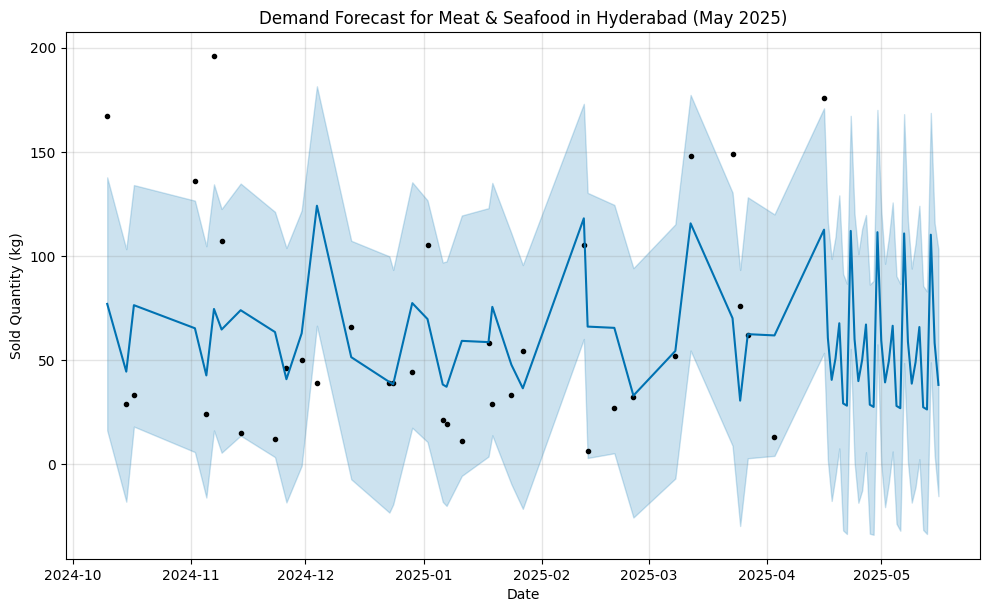

Forecasted Demand for Meat & Seafood in Hyderabad (May 2025):
           ds        yhat  yhat_lower  yhat_upper
49 2025-05-01   59.295862   -0.212167  121.810475
50 2025-05-02   39.155651  -20.803741   96.152576
51 2025-05-03   49.413374   -9.116001  108.698061
52 2025-05-04   66.357631    5.963015  125.597723
53 2025-05-05   27.835618  -28.769444   90.201394
54 2025-05-06   26.749612  -32.123059   86.467205
55 2025-05-07  110.715419   48.467491  168.013381
56 2025-05-08   58.690251    0.855486  116.701733
57 2025-05-09   38.550041  -18.615710   93.833463
58 2025-05-10   48.807763  -11.117739  105.922030


In [74]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('Food_Waste_Optimization_Supermarkets.csv')

# Filter for Meat & Seafood in Hyderabad
df_meat_seafood_hyd = df[(df['Category'] == 'Meat & Seafood') & (df['Store_Location'] == 'Hyderabad')]

# Fix date parsing with mixed formats and dayfirst=True
df_meat_seafood_hyd['Manufacture_Date'] = pd.to_datetime(
    df_meat_seafood_hyd['Manufacture_Date'], 
    format='mixed', 
    dayfirst=True, 
    errors='coerce'
)

# Drop rows with invalid dates (if any)
df_meat_seafood_hyd = df_meat_seafood_hyd.dropna(subset=['Manufacture_Date'])

# Prepare data for Prophet: Aggregate Sold_Quantity by Manufacture_Date
df_prophet = df_meat_seafood_hyd.groupby('Manufacture_Date')['Sold_Quantity'].sum().reset_index()
df_prophet.rename(columns={'Manufacture_Date': 'ds', 'Sold_Quantity': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=True)
model.fit(df_prophet)

# Create future dates for forecasting (30 days into May 2025)
future_dates = model.make_future_dataframe(periods=30)
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Demand Forecast for Meat & Seafood in Hyderabad (May 2025)')
plt.xlabel('Date')
plt.ylabel('Sold Quantity (kg)')
plt.show()

# Print forecasted values for the next 30 days
forecast_future = forecast[forecast['ds'] > '2025-04-30'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("Forecasted Demand for Meat & Seafood in Hyderabad (May 2025):")
print(forecast_future.head(10))